In [5]:
# https://ex-ture.com/blog/2021/01/12/pytorch-rnn/
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import numpy as np
import matplotlib.pyplot as plt
device = torch.device("cuda")

cuda


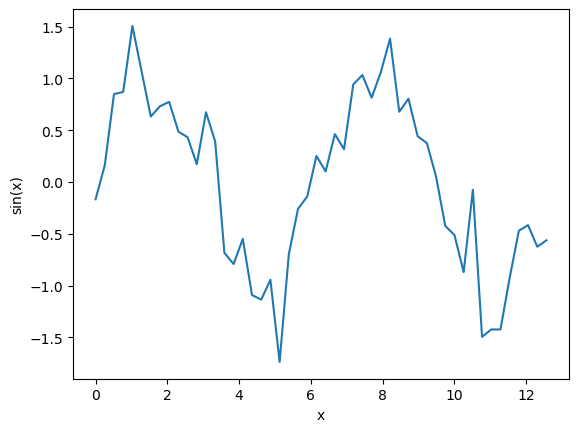

In [6]:
x = np.linspace(0, 4*np.pi)
sin_x = np.sin(x) + np.random.normal(0, 0.3, len(x))
plt.plot(x, sin_x)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [13]:
'''ハイパーパラメータ'''
n_time = 10 #時系列データ10個
n_sample = len(x) - n_time #サンプル数 
'''データを格納する空の配列を準備'''
input_data = np.zeros((n_sample, n_time, 1))
correct_data = np.zeros((n_sample, 1))
'''前処理'''
for i in range(n_sample):
    input_data[i] = sin_x[i:i+n_time].reshape(-1, 1)
    correct_data[i] = [sin_x[i+n_time]]
input_data = torch.FloatTensor(input_data)
correct_data = torch.FloatTensor(correct_data)
'''バッチデータの準備'''
dataset = TensorDataset(input_data, correct_data)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)

In [18]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(1, 64, batch_first=True)
        self.fc = nn.Linear(64, 1)
    def forward(self, x):
        batch_size = x.size(0)
        x = x.to(device)
        x_rnn, hidden = self.rnn(x, None)
        x = self.fc(x_rnn[:, -1, :])
        return x
model = RNN().to(device)

In [19]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_train_memory = []

Epoch: 0 Loss_Train: 0.5962078452110291


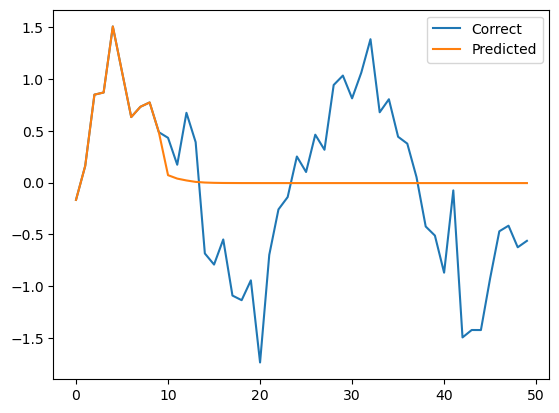

Epoch: 10 Loss_Train: 0.27461405396461486


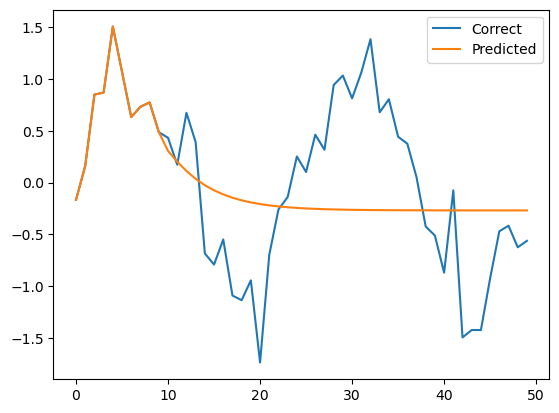

Epoch: 20 Loss_Train: 0.20528495013713838


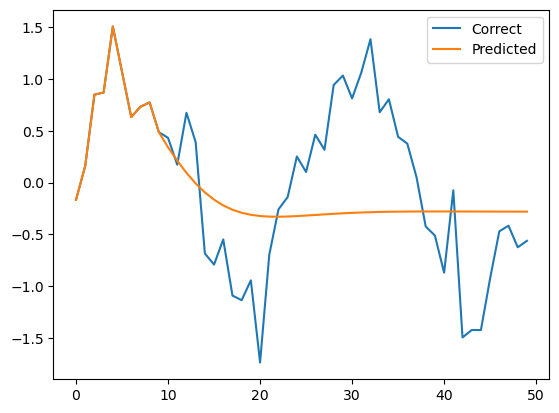

Epoch: 30 Loss_Train: 0.17177344262599945


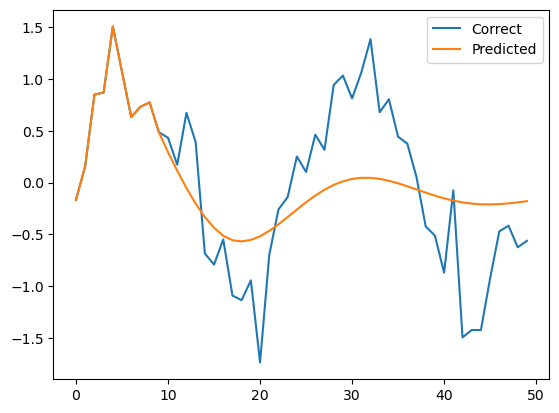

Epoch: 40 Loss_Train: 0.167474465072155


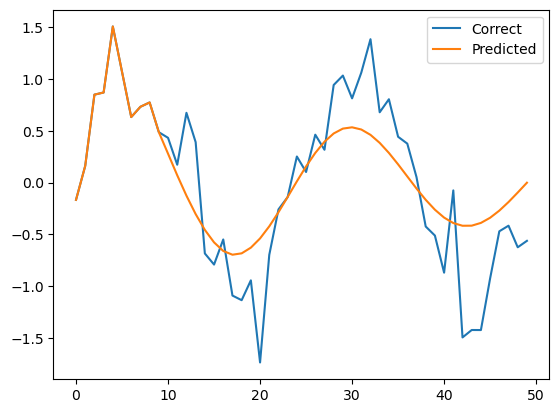

Epoch: 50 Loss_Train: 0.15708798319101333


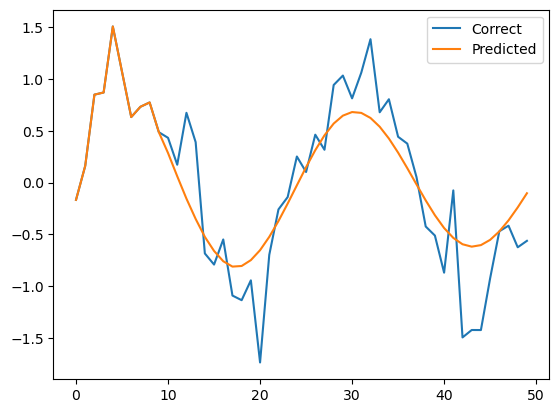

Epoch: 60 Loss_Train: 0.15655648931860924


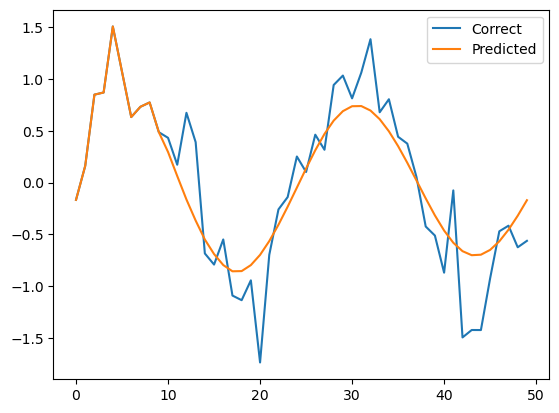

Epoch: 70 Loss_Train: 0.1490752026438713


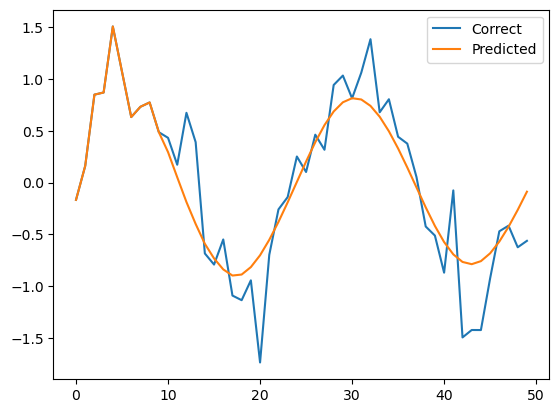

Epoch: 80 Loss_Train: 0.14903179109096526


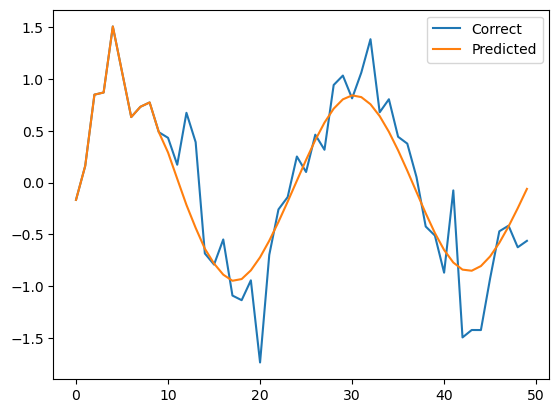

Epoch: 90 Loss_Train: 0.1436885580420494


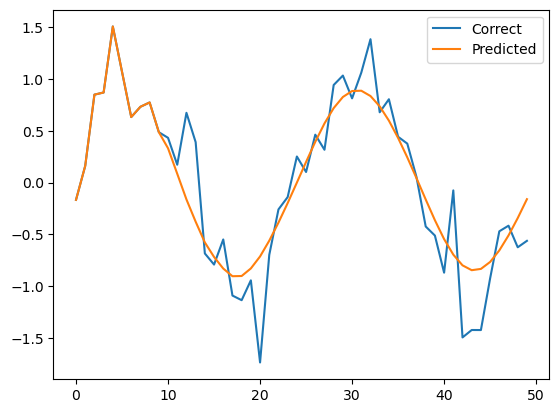

Epoch: 100 Loss_Train: 0.1414944723248482


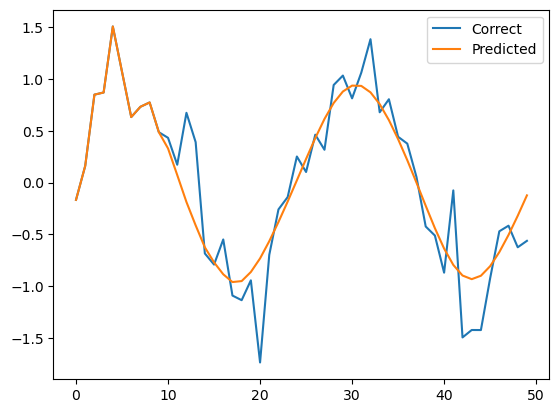

Epoch: 110 Loss_Train: 0.14170527160167695


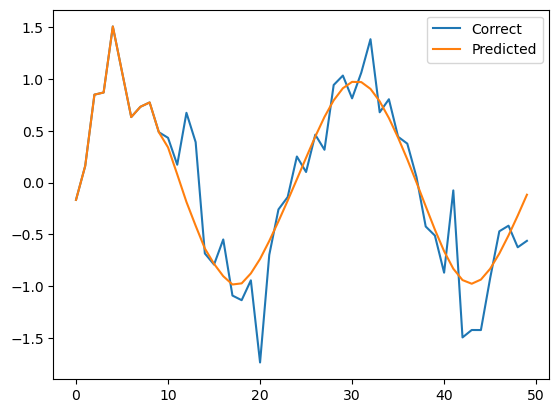

Epoch: 120 Loss_Train: 0.13901490718126297


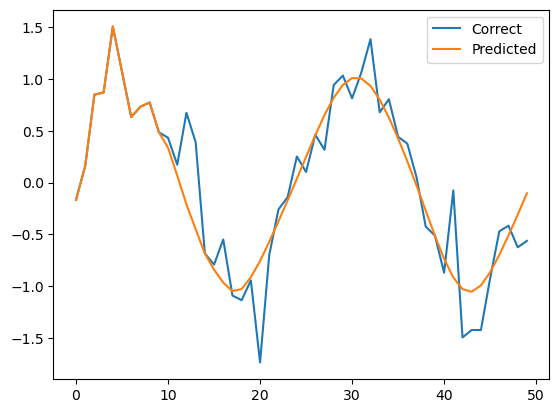

Epoch: 130 Loss_Train: 0.13242488950490952


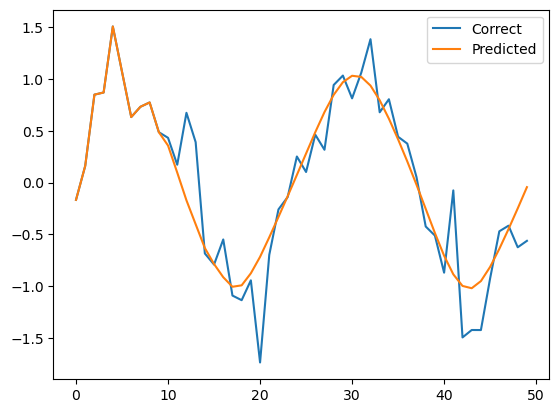

Epoch: 140 Loss_Train: 0.13175838962197303


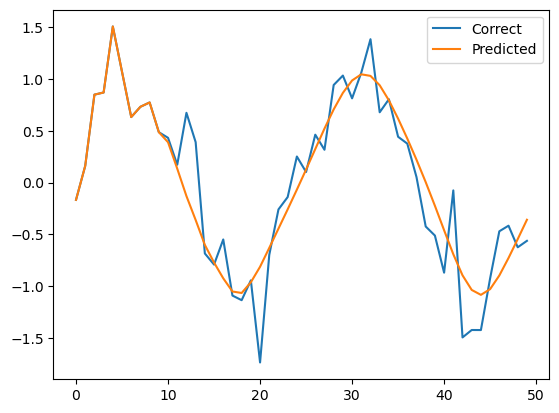

Epoch: 150 Loss_Train: 0.1280951552093029


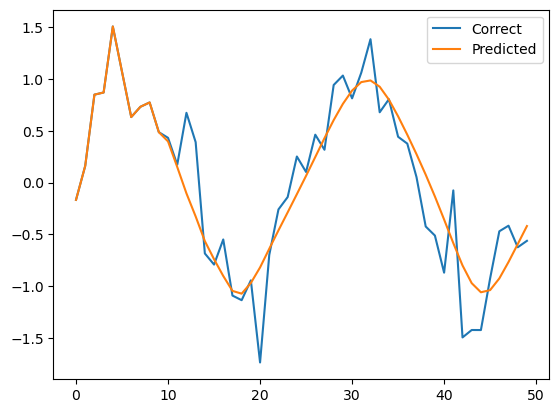

Epoch: 160 Loss_Train: 0.1237928807735443


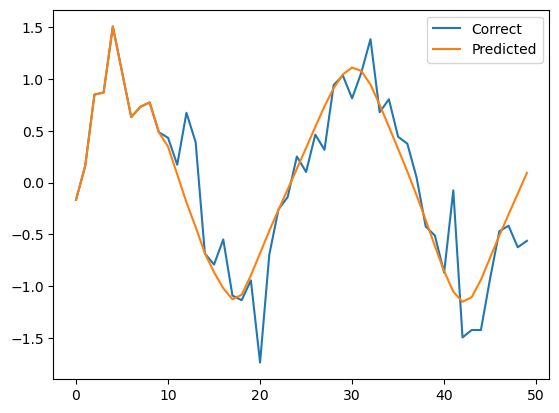

Epoch: 170 Loss_Train: 0.12221209853887557


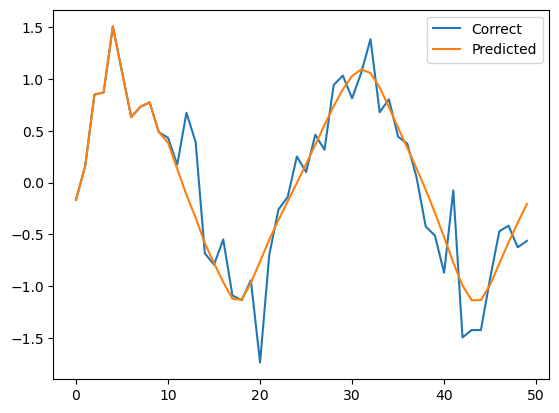

Epoch: 180 Loss_Train: 0.11872650980949402


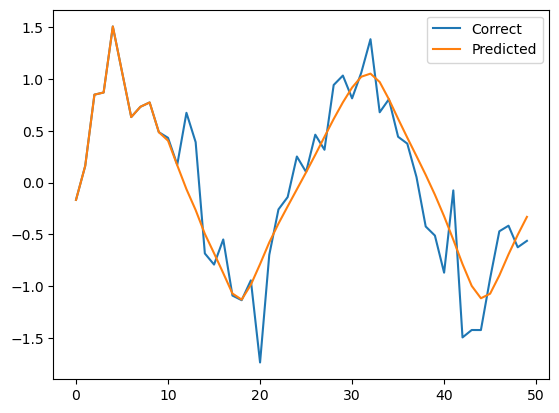

Epoch: 190 Loss_Train: 0.12497863620519638


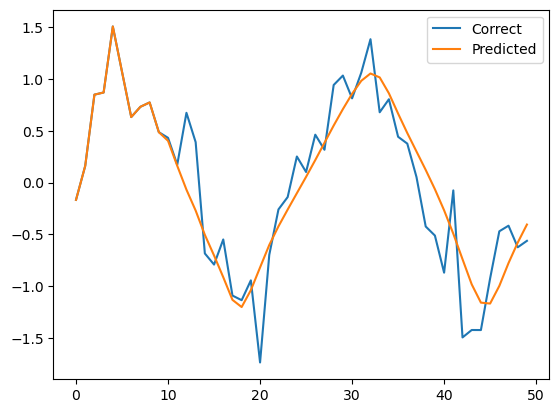

Epoch: 200 Loss_Train: 0.11686973497271538


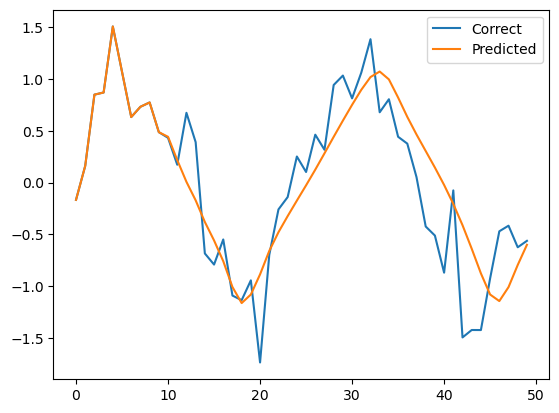

In [20]:
for i in range(201):
  model.train()
  loss_train = 0
  for j, (x, t) in enumerate(train_loader):
    loss = criterion(model(x), t.to(device))
    loss_train += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  loss_train /= j+1
  loss_train_memory.append(loss_train)
  if i%10 == 0:
    print("Epoch:", i, "Loss_Train:", loss_train)
    predicted = list(input_data[0].reshape(-1))
    model.eval()
    with torch.no_grad():
      for i in range(n_sample):
        x = torch.tensor(predicted[-n_time:])
        x = x.reshape(1, n_time, 1)
        predicted.append(model(x)[0].item())
    plt.plot(range(len(sin_x)), sin_x, label="Correct")
    plt.plot(range(len(predicted)), predicted, label="Predicted")
    plt.legend()
    plt.show()


初めの誤差： 59.62 %
最終誤差　： 11.69  %


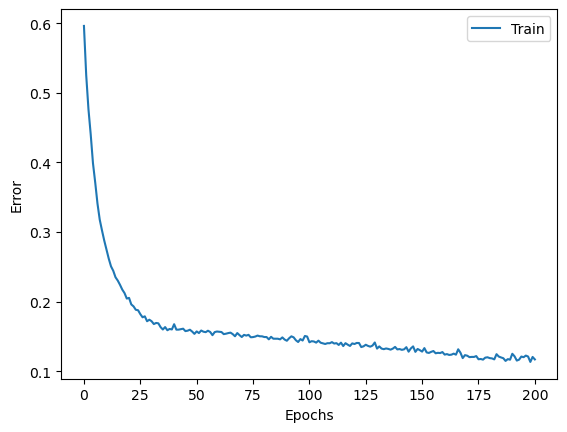

In [23]:
print('初めの誤差：', round(loss_train_memory[0]*100,2), '%')
print('最終誤差　：', round(loss_train_memory[-1]*100,2), ' %')
plt.plot(range(len(loss_train_memory)), loss_train_memory, label='Train')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()